In [1]:
import pandas
import numpy
from matplotlib import pyplot as plt

In [3]:
data_train = pandas.read_csv(r'/home/niubuzhi/Documents/ml/stock-price/NSE-TATAGLOBAL.txt')

In [4]:
data_train.head(2)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.2,233.5,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.1,233.8,233.25,5082859,11859.95


In [6]:
training_set = data_train.iloc[:, 1:2].values

In [23]:
training_set[:2]

array([[234.05],
       [234.55]])

### Scale data into range (0,1) for better performance in deep learning

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Step size is set to be 60

In [9]:
np_train = numpy.array(training_set_scaled)
step_size = 60

X_train = numpy.array([np_train[i:i+60, 0] for i in range(len(np_train) - step_size)])
y_train = np_train[60:, 0]

assert len(X_train) == len(y_train)

#### * Convert X_train to 3D

In [10]:
print(X_train.shape)

(1975, 60)


In [12]:
X_train = numpy.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train.shape

(1975, 60, 1)

### Construct LSTM

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [19]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(loss = 'mean_squared_error', optimizer = 'adam')

regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1975/1975 [==============================] - 8s 4ms/step - loss: 0.0111
Epoch 2/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0032
Epoch 3/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 4/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0026
Epoch 5/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 6/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0025
Epoch 7/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 8/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0019
Epoch 9/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 10/100
1975/1975 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 11/100
1975/1975 [==============================] - 6s 3ms/step - loss: 0.0018
Epoch 12/100
1975/1975 [==============================] - 6s 3ms/step - lo

1975/1975 [==============================] - 6s 3ms/step - loss: 6.6049e-04
Epoch 95/100
1975/1975 [==============================] - 6s 3ms/step - loss: 7.7887e-04
Epoch 96/100
1975/1975 [==============================] - 6s 3ms/step - loss: 6.1969e-04
Epoch 97/100
1975/1975 [==============================] - 5s 3ms/step - loss: 5.6095e-04
Epoch 98/100
1975/1975 [==============================] - 5s 3ms/step - loss: 5.9018e-04
Epoch 99/100
1975/1975 [==============================] - 5s 3ms/step - loss: 5.5365e-04
Epoch 100/100
1975/1975 [==============================] - 5s 3ms/step - loss: 5.5791e-04


### Now we apply the model to the test dataset

In [20]:
data_test = pandas.read_csv(r'/home/niubuzhi/Documents/ml/stock-price/tatatest.txt')

In [21]:
real_stock_price = data_test.iloc[:, 1:2].values

In [22]:
real_stock_price[:2]

array([[220.1],
       [221.1]])

In [24]:
data_total = pandas.concat([data_train['Open'], data_test['Open']], axis = 0)

In [25]:
inputs = data_total[len(data_train) - step_size:].values

In [29]:
inputs = inputs.reshape(-1, 1)

In [45]:
inputs = sc.transform(inputs)

In [46]:
X_test = []
for i in range(step_size, len(inputs)):
    X_test.append( inputs[i - step_size : i, 0] )

In [47]:
X_test = numpy.array(X_test)

In [48]:
X_test.shape

(16, 60)

In [49]:
X_test = numpy.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [50]:
X_test.shape

(16, 60, 1)

### Now pedict the stock price

In [51]:
predicted_stock_price = sc.inverse_transform( regressor.predict(X_test) )

### Visualize the comparison between real and predicted stock prices

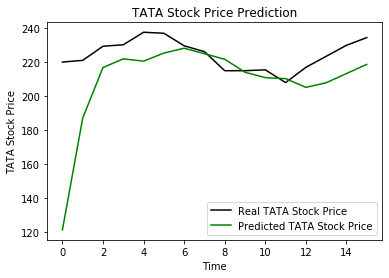

In [52]:
plt.plot(real_stock_price, color = 'black', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()